# Results for MLP for MNIST

In [ ]:
import matplotlib.pyplot as plt
from structure import *


# === Multiple runs example ===

optimizers = [
    make_optimizer_config("PGD", lr=0.01, projection=make_clip_projection(0, 1)),
    make_optimizer_config("PGD", lr=0.01, projection=make_l2_projection(3.0)),
    make_optimizer_config("PGD", lr=0.01, projection=make_binary_projection()),
    make_optimizer_config("PGD", lr=0.01, projection=make_unit_sphere_projection()),
]

optimizers = [
    make_optimizer_config("SGD", lr=0.01),
    make_optimizer_config("GD", lr=0.01),
    make_optimizer_config("Adagrad", lr=0.01),
    make_optimizer_config("Adadelta", lr=1.0),  # pas de lr par défaut
    make_optimizer_config("Momentum", lr=0.01, momentum=0.9),
    make_optimizer_config("Nesterov", lr=0.01, momentum=0.9),
    make_optimizer_config("PartialGD", lr=0.01, update_fraction=0.2),
    make_optimizer_config("PGD", lr=0.01, projection=lambda x: x.clamp(-0.5, 0.5))
]

dataset_list = ["MNIST"]  # tu pourras ajouter "CIFAR10", "FashionMNIST", etc.
model_list = ["MLP"]
results = run_experiments(
    optimizers=optimizers,
    datasets=dataset_list,
    models=model_list,
    epochs=10,
    lr=0.01,
    save_results=True
)



🧪 Running on dataset: MNIST with optimizer: SGD
Epoch 1/10 - Loss: 1.7244 - Accuracy: 0.7959
Epoch 2/10 - Loss: 0.5885 - Accuracy: 0.8817
Epoch 3/10 - Loss: 0.4038 - Accuracy: 0.8963
Epoch 4/10 - Loss: 0.3507 - Accuracy: 0.9082
Epoch 5/10 - Loss: 0.3209 - Accuracy: 0.9147
Epoch 6/10 - Loss: 0.2987 - Accuracy: 0.9211
Epoch 7/10 - Loss: 0.2799 - Accuracy: 0.9246
Epoch 8/10 - Loss: 0.2635 - Accuracy: 0.9274
Epoch 9/10 - Loss: 0.2491 - Accuracy: 0.9328
Epoch 10/10 - Loss: 0.2356 - Accuracy: 0.9343
✅ Results saved to 'results.json'


TypeError: list indices must be integers or slices, not str

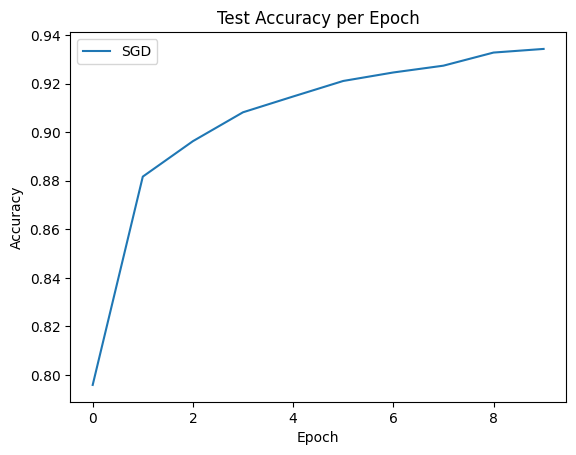

In [4]:


# Optional: plot losses or accuracies
for opt in results:
    plt.plot(opt["accuracies"], label=opt["optimizer"])
plt.title("Test Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1]:
from structure import (
    run_experiments,
    build_optimizer_param_sweep,
    make_model_config
)

# === Setup des optimiseurs ===
optimizers_sweep = []
optimizers_sweep += [dict(name="Newton", params={"lr": 1.0})]

optimizers_sweep += build_optimizer_param_sweep("SGD", lr=[0.01, 0.05, 0.1])
optimizers_sweep += build_optimizer_param_sweep("Adam", lr=[0.001, 0.005, 0.01])
optimizers_sweep += build_optimizer_param_sweep("RMSprop", lr=[0.001, 0.005, 0.01])
optimizers_sweep += build_optimizer_param_sweep("GD", lr=[0.01, 0.05, 0.1])
optimizers_sweep += build_optimizer_param_sweep("PGD", lr=[0.01, 0.05, 0.1])
optimizers_sweep += build_optimizer_param_sweep("PartialGD", lr=[0.01, 0.05, 0.1])
optimizers_sweep += build_optimizer_param_sweep("Momentum", lr=[0.01, 0.05, 0.1])
optimizers_sweep += build_optimizer_param_sweep("Nesterov", lr=[0.01, 0.05, 0.1])

# === Modèle à utiliser ===
models = [make_model_config("MLP", hidden_sizes=[128, 64])]

# === Lancement ===
results = run_experiments(
    datasets=["MNIST"],
    models=models,
    optimizers_with_params=optimizers_sweep,
    scheduler_config=None,
    epochs=5,
    save_results=True,
    save_path="Data/mnist_mlp_many_optim.json"
)



🔹 Run 1
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64]
🛠️ Optimizer   : Newton
    ↳ Optim Params : lr=1.0
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [00:48<00:00,  9.77s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 2
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : SGD
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:04<00:00, 12.86s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 3
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : SGD
    ↳ Optim Params : lr=0.05
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:01<00:00, 12.33s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 4
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : SGD
    ↳ Optim Params : lr=0.1
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:02<00:00, 12.43s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 5
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Adam
    ↳ Optim Params : lr=0.001
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:23<00:00, 16.65s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 6
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Adam
    ↳ Optim Params : lr=0.005
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:24<00:00, 16.92s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 7
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Adam
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:20<00:00, 16.01s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 8
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : RMSprop
    ↳ Optim Params : lr=0.001
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:12<00:00, 14.47s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 9
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : RMSprop
    ↳ Optim Params : lr=0.005
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:14<00:00, 14.96s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 10
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : RMSprop
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:10<00:00, 14.05s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 11
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : GD
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:06<00:00, 13.36s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 12
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : GD
    ↳ Optim Params : lr=0.05
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:10<00:00, 14.14s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 13
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : GD
    ↳ Optim Params : lr=0.1
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:09<00:00, 13.94s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 14
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : PGD
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:12<00:00, 14.55s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 15
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : PGD
    ↳ Optim Params : lr=0.05
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:06<00:00, 13.35s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 16
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : PGD
    ↳ Optim Params : lr=0.1
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:12<00:00, 14.57s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 17
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : PartialGD
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:14<00:00, 14.91s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 18
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : PartialGD
    ↳ Optim Params : lr=0.05
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:13<00:00, 14.65s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 19
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : PartialGD
    ↳ Optim Params : lr=0.1
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:14<00:00, 14.97s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 20
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Momentum
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:23<00:00, 16.77s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 21
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Momentum
    ↳ Optim Params : lr=0.05
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:25<00:00, 17.19s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 22
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Momentum
    ↳ Optim Params : lr=0.1
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:24<00:00, 16.91s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 23
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Nesterov
    ↳ Optim Params : lr=0.01
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:16<00:00, 15.27s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 24
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Nesterov
    ↳ Optim Params : lr=0.05
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:27<00:00, 17.56s/epoch]


💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

🔹 Run 25
📊 Dataset     : MNIST
🧠 Model       : MLP
    ↳ Model Params : hidden_sizes=[128, 64], num_classes=10, input_size=784
🛠️ Optimizer   : Nesterov
    ↳ Optim Params : lr=0.1
📈 Epochs      : 5


Training: 100%|██████████| 5/5 [01:30<00:00, 18.09s/epoch]

💾 Temp results saved to Data/mnist_mlp_many_optim_temp.json

✅ Résultats sauvegardés dans 'Data/mnist_mlp_many_optim.json'


✅ 25 expériences chargées depuis 'Data\mnist_mlp_many_optim.json'


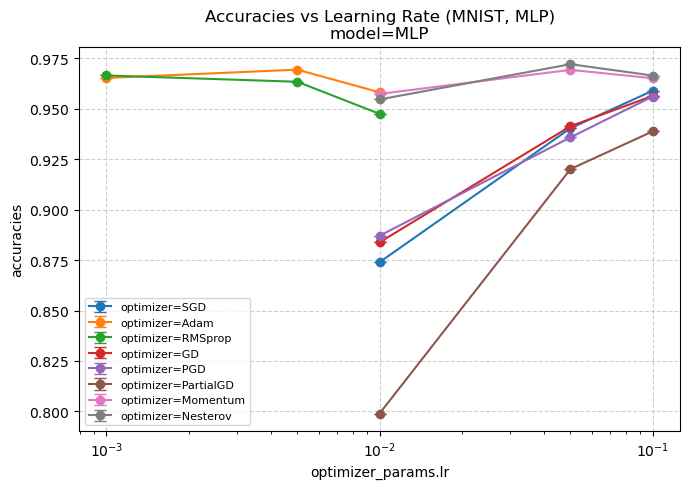

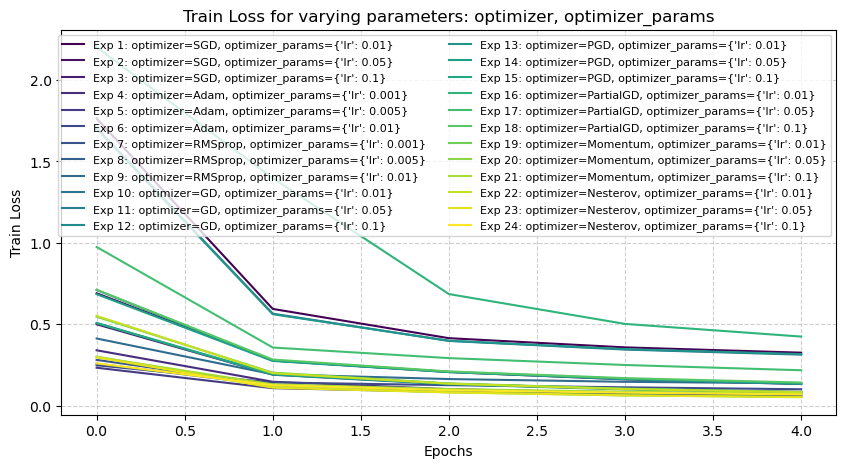

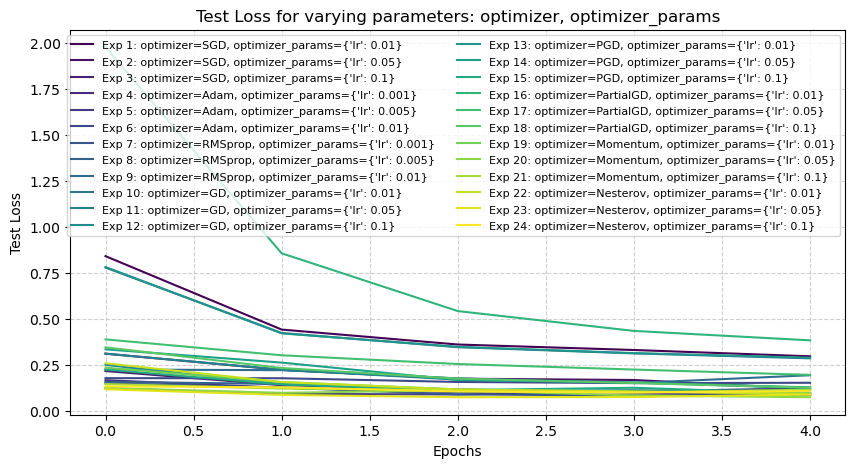

In [8]:
from visualization import load_results, plot_metrics_vs_param_grouped, plot_losses

results = load_results("mnist_mlp_many_optim")


results = results[1:]

plot_metrics_vs_param_grouped(
    results,
    x_param="optimizer_params.lr",
    metrics=["accuracies"],
    group_by="optimizer",
    split_by="model",
    title="Accuracies vs Learning Rate (MNIST, MLP)",
    save_path="acc_vs_lr_mnist_mlp",
    logx=True
)

plot_losses(results,
    save_path="loss_vs_epoch_mnist_mlp",
)
